<a href="https://colab.research.google.com/github/Kvaathe/AAMD/blob/main/Trabajo2/Daniel_Carrasco_Perez_Trabajo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de decisión


Utilizamos el dataset de las plantas Iris desde esta ubicación:
https://www.openml.org/data/get_csv/61/dataset_61_iris.arff

Para ello, separaremos nuestro dataset: usaremos un 80% de los datos para entrenar los algoritmos y un 20% de los datos para hacer los tests de predicción. Ésta suele ser una proporción habitual.

Además, utilizaremos una validación cruzada estratificada de 10 veces (k-fold) para estimar la precisión del modelo.

Debido a problemas con los certificados en Mac, deben añadirse las dos líneas siguientes para importar correctamente ficheros de forma segura.

In [45]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Cargamos las librerías necesarias:

In [1]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import pydotplus
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import math
import seaborn as sns

Cargamos el dataset:

In [2]:
url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/Trabajo2/Admission_Predict.csv"
#url = "https://raw.githubusercontent.com/Kvaathe/AAMD/main/Trabajo2/Admission_Predict_Ver1.1.csv"

In [3]:
dataset = pd.read_csv(url)

In [4]:
print(dataset)
dataset.info()
dataset.corr()

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
..          ...        ...          ...  ...   ...       ...               ...
395         396        324          110  ...  9.04         1              0.82
396         397        325          107  ...  9.11         1              0.84
397         398        330          116  ...  9.45         1              0.91
398         399        312          103  ...  8.78         0              0.67
399         400        333          117  ...  9.66         1              0.95

[400 rows x 9 columns]
<class 'pandas.core.frame.Da

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


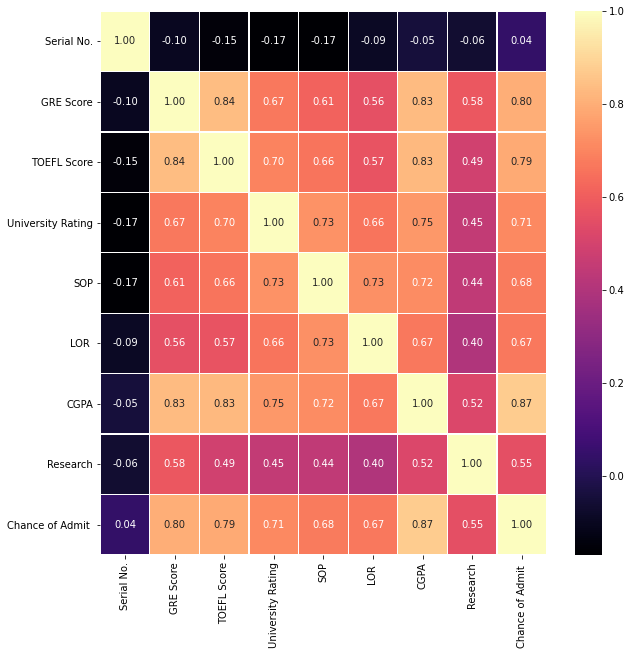

In [5]:
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths =0.10,fmt = '.2f',cmap='magma')

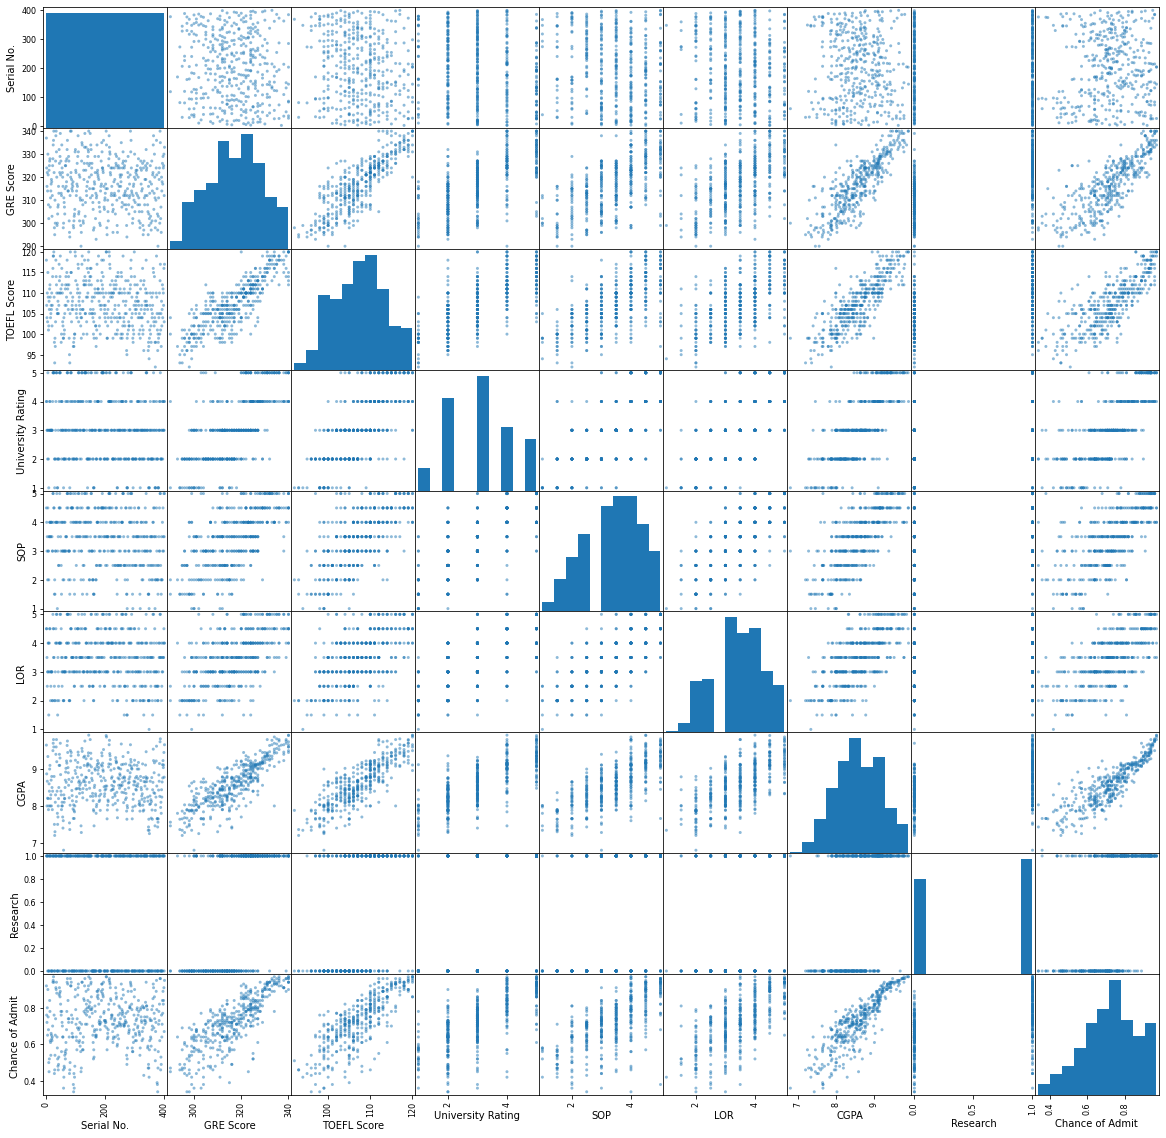

In [6]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

In [7]:
dataset.drop('Serial No.',axis=1,inplace=True)

     GRE Score  TOEFL Score  ...  Research  Chance of Admit 
0          337          118  ...         1              0.92
1          324          107  ...         1              0.76
2          316          104  ...         1              0.72
3          322          110  ...         1              0.80
4          314          103  ...         0              0.65
..         ...          ...  ...       ...               ...
395        324          110  ...         1              0.82
396        325          107  ...         1              0.84
397        330          116  ...         1              0.91
398        312          103  ...         0              0.67
399        333          117  ...         1              0.95

[400 rows x 8 columns]


In [8]:
datos = dataset.iloc[:,-1:]
print(datos)
print(datos.iloc[0,0])
for x in range(len(datos)):
  if datos.iloc[x, 0] >= 0.60:
    datos.iloc[x, 0] = 'Yes'
  else:
    datos.iloc[x, 0] = 'No'
print(datos)
dataset.iloc[:,-1:] = datos
print(dataset)

     Chance of Admit 
0                0.92
1                0.76
2                0.72
3                0.80
4                0.65
..                ...
395              0.82
396              0.84
397              0.91
398              0.67
399              0.95

[400 rows x 1 columns]
0.92
    Chance of Admit 
0                Yes
1                Yes
2                Yes
3                Yes
4                Yes
..               ...
395              Yes
396              Yes
397              Yes
398              Yes
399              Yes

[400 rows x 1 columns]
     GRE Score  TOEFL Score  University Rating  ...  CGPA  Research  Chance of Admit 
0          337          118                  4  ...  9.65         1               Yes
1          324          107                  4  ...  8.87         1               Yes
2          316          104                  3  ...  8.00         1               Yes
3          322          110                  3  ...  8.67         1               Yes
4

In [9]:
dataset.SOP = dataset.SOP.astype(int)
dataset.iloc[:,4] = dataset.iloc[:,4].astype(int)
dataset.CGPA = dataset.CGPA.astype(int)

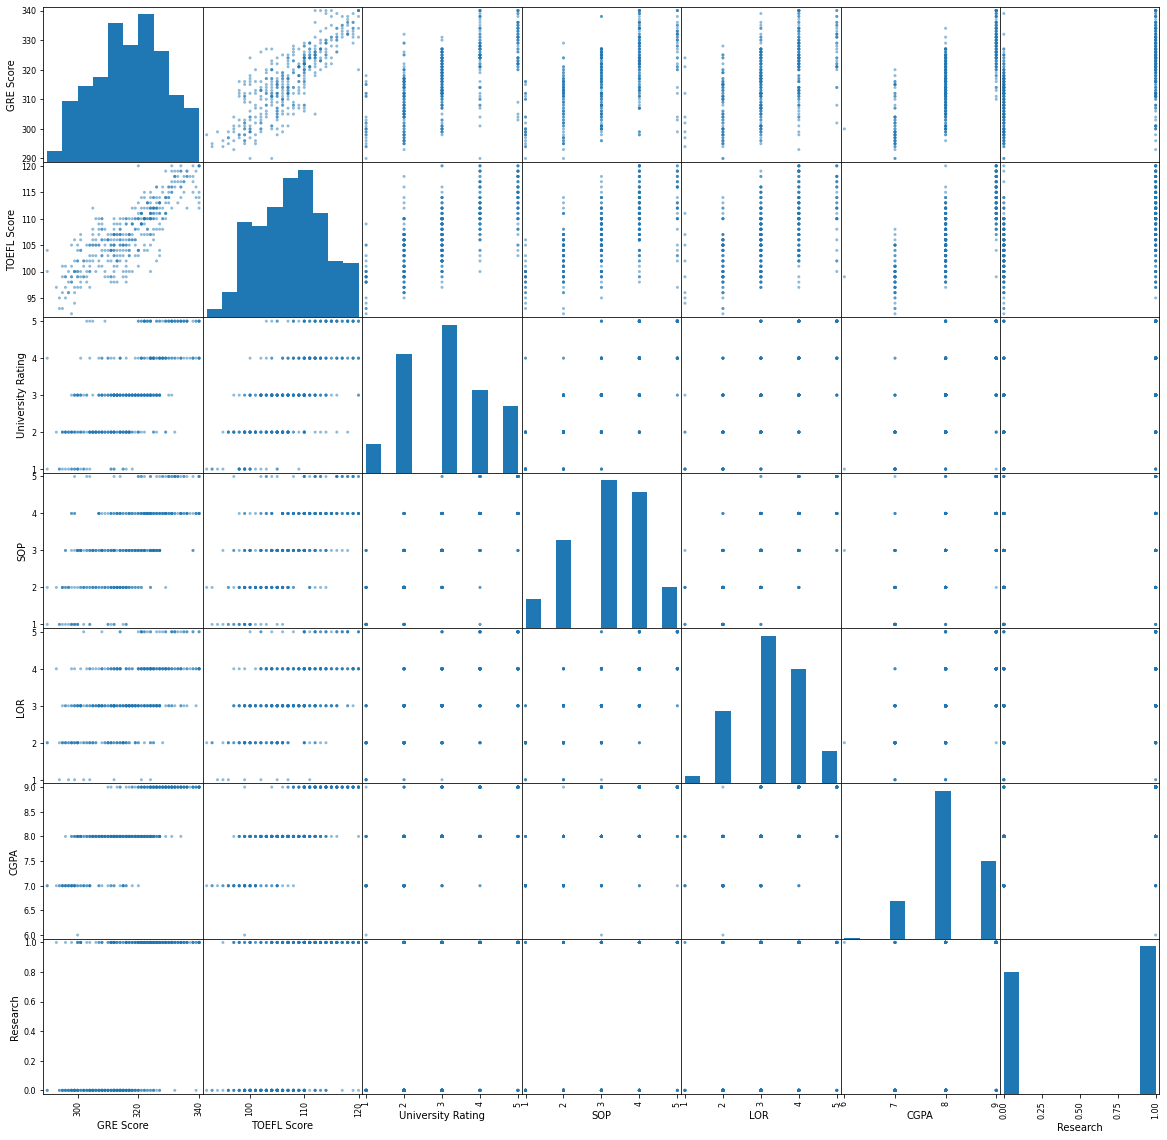

In [10]:
scatter_matrix(dataset, figsize=(20,20))
pyplot.show()

Dividimos el dataset en 80% de datos para entrenar y 20% para test:

In [12]:
array = dataset.values
X = array[:,0:7]
y = array[:,7]
#X = array[:,0:4]
#y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

Realizamos predicciones con el dataset de validación:

In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(X_train)
print(X_validation)
print(Y_train)
print(Y_validation)

Damos detalles sobre el modelo:

In [14]:
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Evaluamos las predicciones, en primer lugar la precisión obtenida:

In [15]:
print(accuracy_score(Y_validation, predictions))

0.9


Ahora la matriz de confusión:

In [16]:
print(confusion_matrix(Y_validation, predictions))

[[12  6]
 [ 2 60]]


Un informe de clasificación:

In [17]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

          No       0.86      0.67      0.75        18
         Yes       0.91      0.97      0.94        62

    accuracy                           0.90        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.90      0.90      0.90        80



Predicción de ejemplo:

In [19]:
print(model.predict([[320,	110,	5,	5,	5,	9,	1]]))

['Yes']


Dibujamos el árbol:

In [35]:
data = tree.export_graphviz(model, out_file=None, feature_names=dataset.columns.values[0:7], class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)

pydotplus.set_size('"20!"')
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
print(img.shape)
imgplot = plt.imshow(img)
plt.figure(figsize=(40, 40))
plt.show()

AttributeError: ignored